In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px   
%matplotlib inline
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()



,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
cdf = df[['car_ID','symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','price','enginesize','horsepower','carwidth']]
cdf.head(9)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,price,enginesize,horsepower,carwidth
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,13495.0,130,111,64.1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,16500.0,130,111,64.1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,16500.0,152,154,65.5
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,13950.0,109,102,66.2
4,5,2,audi 100ls,gas,std,four,sedan,4wd,17450.0,136,115,66.4
5,6,2,audi fox,gas,std,two,sedan,fwd,15250.0,136,110,66.3
6,7,1,audi 100ls,gas,std,four,sedan,fwd,17710.0,136,110,71.4
7,8,1,audi 5000,gas,std,four,wagon,fwd,18920.0,136,110,71.4
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,23875.0,131,140,71.4


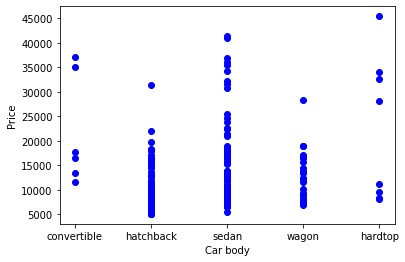

In [6]:
plt.scatter(cdf.carbody, cdf.price,  color='blue')
plt.xlabel("Car body")
plt.ylabel("Price")
plt.show()

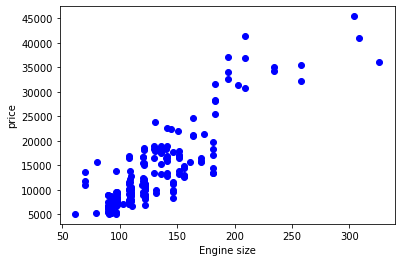

In [7]:
plt.scatter(cdf.enginesize, cdf.price,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("price")
plt.show()

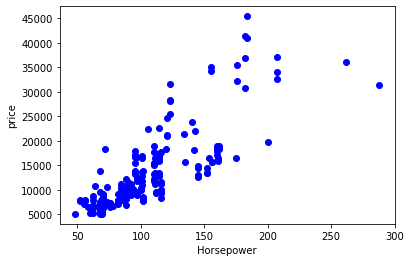

In [8]:
plt.scatter(cdf.horsepower, cdf.price,  color='blue')
plt.xlabel("Horsepower")
plt.ylabel("price")
plt.show()

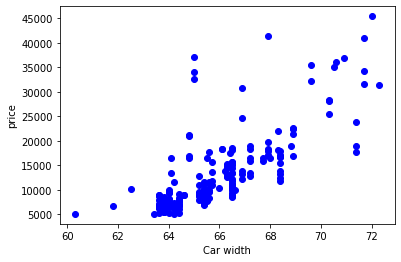

In [9]:
plt.scatter(cdf.carwidth, cdf.price,  color='blue')
plt.xlabel("Car width")
plt.ylabel("price")
plt.show()

In [10]:
cdf.corr()

,car_ID,symboling,price,enginesize,horsepower,carwidth
car_ID,1.000000,-0.151621,-0.109093,-0.033930,-0.015006,0.052387
symboling,-0.151621,1.000000,-0.079978,-0.105790,0.070873,-0.232919
price,-0.109093,-0.079978,1.000000,0.874145,0.808139,0.759325
enginesize,-0.033930,-0.105790,0.874145,1.000000,0.809769,0.735433
horsepower,-0.015006,0.070873,0.808139,0.809769,1.000000,0.640732
carwidth,0.052387,-0.232919,0.759325,0.735433,0.640732,1.000000


In [11]:
msk=np.random.rand(len(df)) <0.8
train=cdf[msk]
test=cdf[~msk]

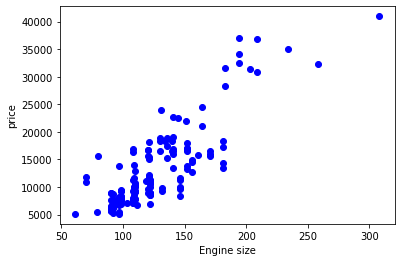

In [12]:
plt.scatter(train.enginesize, train.price,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("price")
plt.show()

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['enginesize']])
train_y = np.asanyarray(train[['price']])
regr.fit(train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[171.01355371]]
Intercept:  [-8398.42356414]


In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['enginesize']])
train_y = np.asanyarray(train[['price']])
regr.fit(train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[171.01355371]]
Intercept:  [-8398.42356414]


In [17]:


test_x = np.asanyarray(test[['enginesize']])
test_y = np.asanyarray(test[['price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))


Mean absolute error: 2635.23
Residual sum of squares (MSE): 16023459.46
